# JAMBOREE PRODUCTIONS | Unsupervised Machine Learning

### This script contains the following points:

#### 1. Importing Libraries
#### 2. Importing Data
#### 3. Cleaning the Data
        Standardizing the data
#### 4. The Elbow Technique
#### 5. k-Means Clustering
#### 6. Visualizing the Clusters
        Runtime as the predictor variable
        Budget as the predictor variable
        Vote Count as the predictor variable
        Thoughts on Clusters
        Future Analysis Thoughts
#### 7. Adding Cluster Column to Main Data
#### 8. Exporting Data

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from scipy import stats 
import pylab as pl #

In [2]:
# View visualizations without directly calling them
%matplotlib inline

## 2. Importing Data

In [3]:
# Set project folder as a string
path = r'/Users/matthewjones/Documents/CareerFoundry/Data Immersion/Achievement 6/Jamboree Entertainment Analysis'

In [4]:
df_movies = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'clean_movies.csv'), index_col = False)

## 3. Cleaning the Data

In [5]:
df_movies.columns

Index(['Unnamed: 0', 'id', 'title', 'vote_average', 'vote_count',
       'release_date', 'revenue', 'runtime', 'budget', 'synopsis', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'original_language', 'action', 'adventure', 'animation', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'history',
       'horror', 'music', 'mystery', 'romance', 'science_fiction', 'tv_movie',
       'thriller', 'war', 'western', 'runtime_category', 'budget_category'],
      dtype='object')

In [6]:
# Drop unnecessary column
df_movies = df_movies.drop('Unnamed: 0', axis = 1)

In [7]:
df_movies.shape

(490711, 35)

In [8]:
df_movies.head(5)

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,synopsis,genres,...,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,runtime_category,budget_category
0,27205,Inception,8.364,34495,2010-07-15,8.255328e+08,148,160000000.0,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",...,0,0,0,1,0,0,0,0,Long Films,High-Budget
1,157336,Interstellar,8.417,32571,2014-11-05,7.017292e+08,169,165000000.0,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",...,0,0,0,1,0,0,0,0,Long Films,High-Budget
2,155,The Dark Knight,8.512,30619,2008-07-16,1.004558e+09,152,185000000.0,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",...,0,0,0,0,0,1,0,0,Long Films,High-Budget
3,19995,Avatar,7.573,29815,2009-12-15,2.923706e+09,162,237000000.0,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",...,0,0,0,1,0,0,0,0,Long Films,High-Budget
4,24428,The Avengers,7.710,29166,2012-04-25,1.518816e+09,143,220000000.0,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",...,0,0,0,1,0,0,0,0,Long Films,High-Budget


In [9]:
# Subset the data to only include films that have a budget, a revenue, and at least 150 votes
df_voted_movies = df_movies.loc[(df_movies['budget'] > 0) & (df_movies['revenue'] > 0) & 
                                (df_movies['vote_count'] >= 150)]

In [10]:
# Select only the non-categorical variables to use in the analysis
df_clustering_data = df_voted_movies[['id', 'vote_average', 'revenue', 'runtime', 
                                      'budget']]

In [11]:
df_clustering_data.head()

,id,vote_average,revenue,runtime,budget
0,27205,8.364,8.255328e+08,148,160000000.0
1,157336,8.417,7.017292e+08,169,165000000.0
2,155,8.512,1.004558e+09,152,185000000.0
3,19995,7.573,2.923706e+09,162,237000000.0
4,24428,7.710,1.518816e+09,143,220000000.0


### Standardizing the data

In [12]:
# Standardize each variable
df_clustering_data['vote_average'] = stats.zscore(df_clustering_data['vote_average'])
df_clustering_data['revenue'] = stats.zscore(df_clustering_data['revenue']) 
df_clustering_data['runtime'] = stats.zscore(df_clustering_data['runtime'])
df_clustering_data['budget'] = stats.zscore(df_clustering_data['budget']) 

/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_77145/3579209616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering_data['vote_average'] = stats.zscore(df_clustering_data['vote_average'])
/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_77145/3579209616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering_data['revenue'] = stats.zscore(df_clustering_data['revenue'])
/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_77145/3579209616.py:3: SettingWithC

In [13]:
df_clustering_data.head()

,id,vote_average,revenue,runtime,budget
0,27205,2.263407,4.746752,1.889092,3.497620
1,157336,2.329107,3.968853,2.878257,3.626738
2,155,2.446871,5.871629,2.077505,4.143212
3,19995,1.282870,17.930265,2.548535,5.486043
4,24428,1.452698,9.102876,1.653577,5.047040


## 4. The Elbow Technique

In [14]:
# Define the k-means clusters for 1-10 to apply to the data
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
# Fit the data to the k-means algorithm, and collect the scores
score = [kmeans[i].fit(df_clustering_data).score(df_clustering_data) for i in range(len(kmeans))]

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-429463700462641.8,
 -84445107935838.95,
 -36052159040505.164,
 -20823470203446.14,
 -13407360838813.414,
 -9089712312005.482,
 -6802687768165.789,
 -5324239135765.533,
 -4213786889250.469]

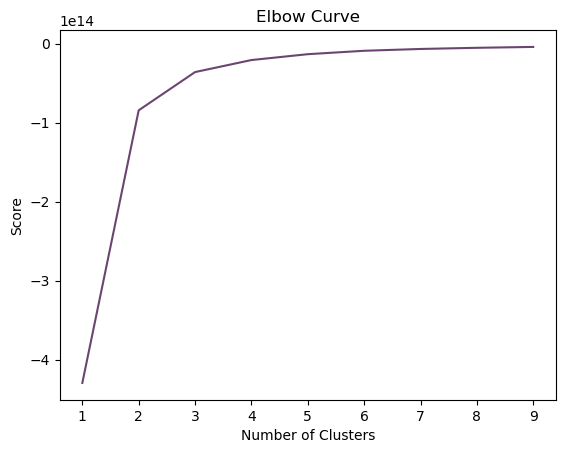

In [16]:
# Plot the scores on an elbow curve using PyLab.
pl.plot(num_cl, score, color = '#6C4471')

# Format title and axes
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

At around **3 clusters** is where the curve starts to flatten. This means the algorithm is segmenting the data into three different clusters, and these clusters could help visualize trends that I may have missed in previous analyses.

## 5. k-Means Clustering

In [26]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [27]:
# Fit the k-means object to the data.
kmeans.fit(df_clustering_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
# Create a new column in the dataframe to house the number cluster each film belongs to
df_clustering_data['clusters'] = kmeans.fit_predict(df_clustering_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_77145/111048226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering_data['clusters'] = kmeans.fit_predict(df_clustering_data)


In [29]:
# Count the number of films in each cluster
df_clustering_data['clusters'].value_counts()

clusters
0    6619
1    1893
2     948
Name: count, dtype: int64

## 6. Visualizing the Clusters

### Runtime as the predictor variable

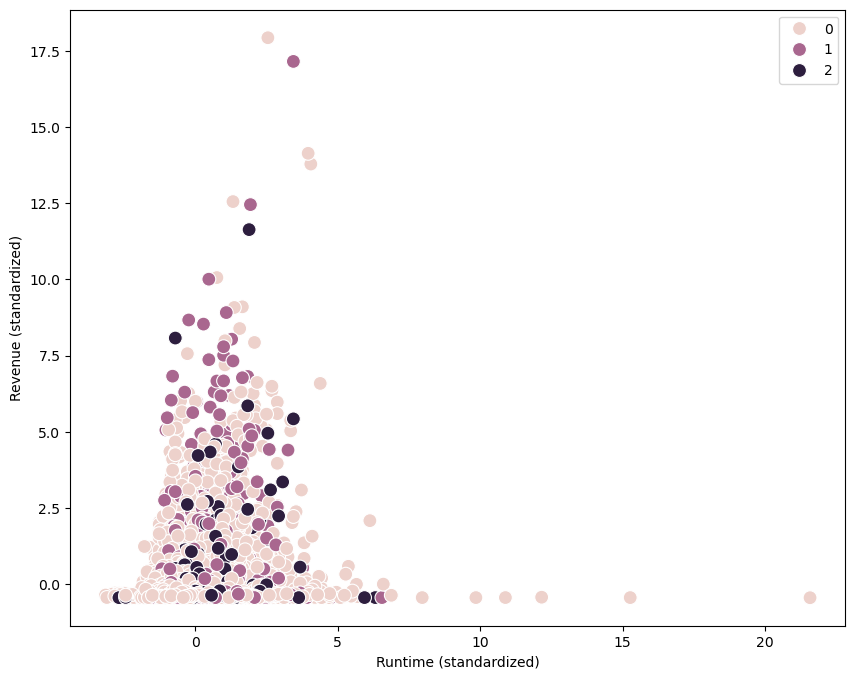

In [30]:
# Plot the revenue against the runtime, color-coding by cluster
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_clustering_data['runtime'], y = df_clustering_data['revenue'], 
                     hue = kmeans.labels_, s=100) 

# Format title and axes
plt.xlabel('Runtime (standardized)')
plt.ylabel('Revenue (standardized)')
plt.show()

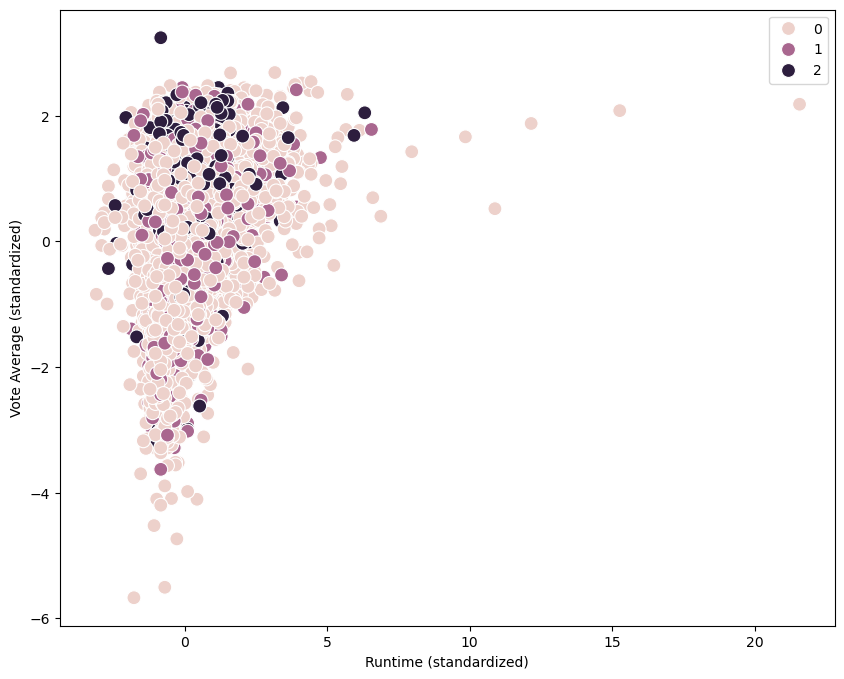

In [31]:
# Plot the vote average against the runtime, color-coding by cluster
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_clustering_data['runtime'], y = df_clustering_data['vote_average'], 
                     hue = kmeans.labels_, s=100) 

# Format title and axes
plt.xlabel('Runtime (standardized)')
plt.ylabel('Vote Average (standardized)')
plt.show()

### Budget as the predictor variable

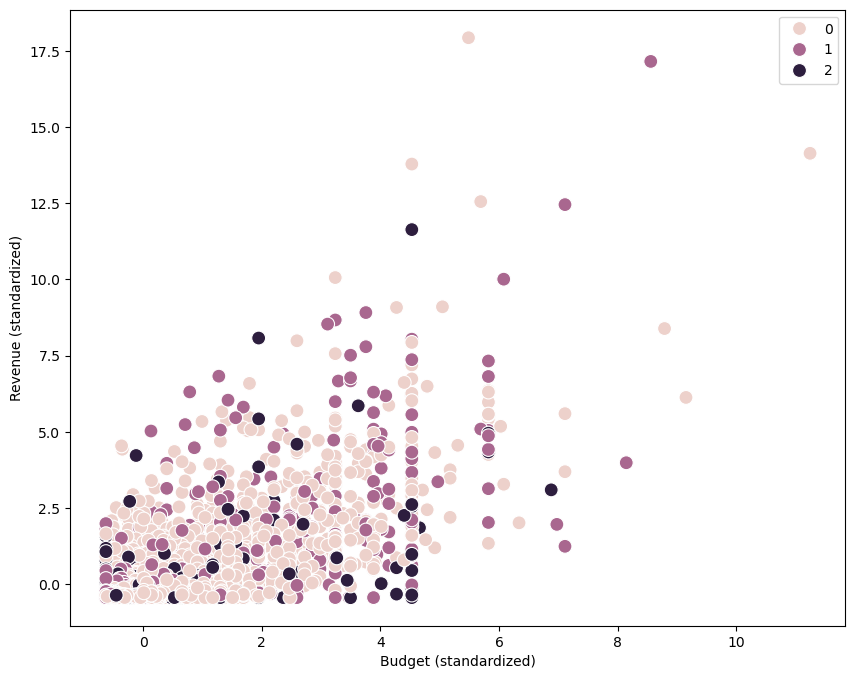

In [32]:
# Plot the revenue against the budget, color-coding by cluster
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_clustering_data['budget'], y = df_clustering_data['revenue'], 
                     hue = kmeans.labels_, s=100) 

# Format title and axes
plt.xlabel('Budget (standardized)')
plt.ylabel('Revenue (standardized)')
plt.show()

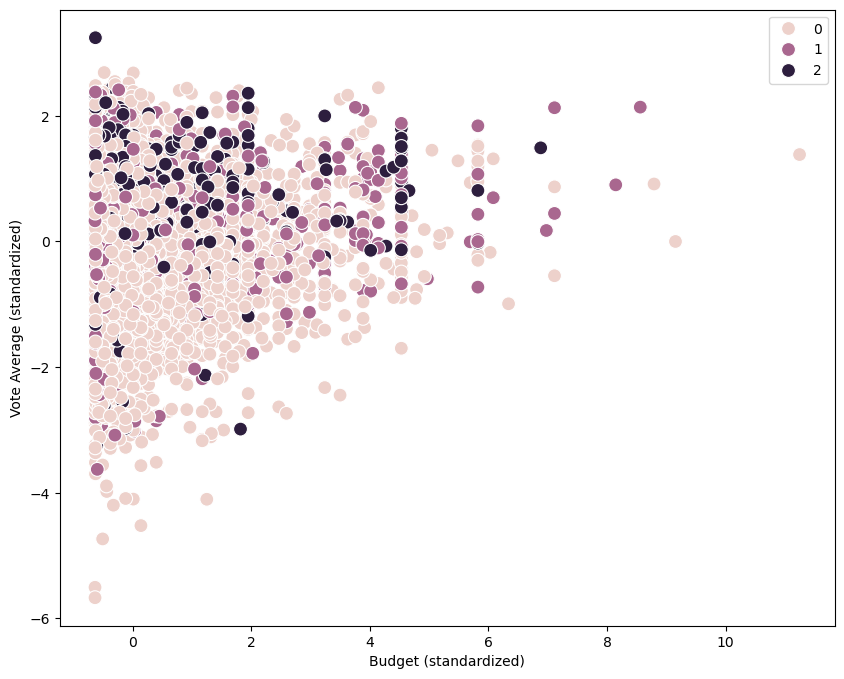

In [33]:
# Plot the vote average against the budget, color-coding by cluster
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_clustering_data['budget'], y = df_clustering_data['vote_average'], 
                     hue = kmeans.labels_, s=100) 

# Format title and axes
plt.xlabel('Budget (standardized)')
plt.ylabel('Vote Average (standardized)')
plt.show()

In [35]:
# Rename the cluster numbers to the names of the colors assigned to them
df_clustering_data.loc[df_clustering_data['clusters'] == 0, 'cluster'] = 'Pink'
df_clustering_data.loc[df_clustering_data['clusters'] == 1, 'cluster'] = 'Grape'
df_clustering_data.loc[df_clustering_data['clusters'] == 2, 'cluster'] = 'Eggplant'

/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_77145/1665924438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering_data.loc[df_clustering_data['clusters'] == 0, 'cluster'] = 'Pink'


In [36]:
# Create a function to manually order the 'cluster' column
cluster_order = ['Pink', 'Grape', 'Eggplant']
cluster_order_func = {key: i for i, key in enumerate(cluster_order)}

In [37]:
df_clustering_data.head()

,id,vote_average,revenue,runtime,budget,clusters,cluster
0,27205,2.263407,4.746752,1.889092,3.497620,0,Pink
1,157336,2.329107,3.968853,2.878257,3.626738,0,Pink
2,155,2.446871,5.871629,2.077505,4.143212,0,Pink
3,19995,1.282870,17.930265,2.548535,5.486043,0,Pink
4,24428,1.452698,9.102876,1.653577,5.047040,0,Pink


### Thoughts on Clusters:
        These clusters do not make sense to me. For more or less all measures, the different clusters are 
        equally spread throughout the plot. It seems the Eggplant cluster (#2) tend to be have the highest vote 
        average overall, with the Grape cluster (#1) and the Pink cluster (#0) somewhere behind. But for 
        revenue, it's unclear how the algorithm segmented the data into clusters.
        
        Prior to standardizing the data, there were more defined differences between the clusters. Clusters were 
        definted by a combination of their revenue, budget, and runtime. But this observation did not persist 
        after standardization. 

In [39]:
# Calculate the descriptive statistics of the cluster data
df_cluster_statistics = df_clustering_data.groupby('cluster').agg({'vote_average' : ['mean', 'median'], 
                                                                   'revenue' : ['mean', 'median'],
                                                                   'runtime' : ['mean', 'median'],
                                                                   'budget' : ['mean', 'median']})

# Sort the cluster data by cluster
df_cluster_statistics = df_cluster_statistics.sort_values(by=['cluster'], 
                                              key=lambda x: x.map(cluster_order_func))

# Show the data
df_cluster_statistics

vote_average             revenue             runtime            \
                 mean    median      mean    median      mean    median   
cluster                                                                   
Pink        -0.030084 -0.006332  0.008743 -0.314573 -0.006253 -0.183443   
Grape       -0.046143 -0.006332  0.052408 -0.390245  0.000665 -0.136340   
Eggplant     0.302186  0.328984 -0.165691 -0.412103  0.042334 -0.136340   

            budget            
              mean    median  
cluster                       
Pink      0.013481 -0.324284  
Grape     0.019273 -0.424874  
Eggplant -0.132612 -0.505050

### Future Analysis Thoughts:
        We are going to need furthur analysis to help predict film performance because this clustering model 
        did not yield positive results. The Eggplant cluster have the highest vote average and highest average 
        runtime. But beyond that, the differences in budget and revenue do not seem terribly significant. So the 
        most we may glean from this is that films in the Eggplant cluster could be the films that fewer people 
        see, but those who do really like.
        
        Combined with a logistical regression or another classification model (on genres, languages, etc.), we 
        may be able to predict revenue and other success metrics within the Eggplant cluster.

        Given that we standardized the data, I could be missing important insights. For instance, the 
        differences in budget or revenue could be much greater than I think, given that those values are on 
        the scale of millions of dollars. And while the standardized data is not as satisfying as anticipated, 
        we can be more sure that the data used is not biased.

## 7. Adding Cluster Column to Main Data

In [53]:
# Left merge df_movies with df_clustering_data on 'id'
df_complete = df_movies.merge(df_clustering_data, left_on = 'id', right_on = 'id', how = 'left', indicator = True)

In [54]:
# Check the merge flag
df_complete['_merge'].value_counts()

_merge
left_only     481251
both            9460
right_only         0
Name: count, dtype: int64

In [55]:
df_complete.columns

Index(['id', 'title', 'vote_average_x', 'vote_count', 'release_date',
       'revenue_x', 'runtime_x', 'budget_x', 'synopsis', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'original_language', 'action', 'adventure', 'animation', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'history',
       'horror', 'music', 'mystery', 'romance', 'science_fiction', 'tv_movie',
       'thriller', 'war', 'western', 'runtime_category', 'budget_category',
       'vote_average_y', 'revenue_y', 'runtime_y', 'budget_y', 'clusters',
       'cluster', '_merge'],
      dtype='object')

In [56]:
# Drop unnecessary columns
df_complete = df_complete.drop(['vote_average_y', 'revenue_y', 'runtime_y', 'budget_y', 'clusters', 
                                '_merge'], axis = 1)

# Rename the automatically renamed columns
df_complete = df_complete.rename({'vote_average_x' : 'vote_average', 'revenue_x' : 'revenue', 
                                  'runtime_x' : 'runtime', 'budget_x' : 'budget'}, axis = 1)

In [57]:
# Check the output
df_complete.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,synopsis,genres,...,mystery,romance,science_fiction,tv_movie,thriller,war,western,runtime_category,budget_category,cluster
0,27205,Inception,8.364,34495,2010-07-15,8.255328e+08,148,160000000.0,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",...,0,0,1,0,0,0,0,Long Films,High-Budget,Pink
1,157336,Interstellar,8.417,32571,2014-11-05,7.017292e+08,169,165000000.0,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",...,0,0,1,0,0,0,0,Long Films,High-Budget,Pink
2,155,The Dark Knight,8.512,30619,2008-07-16,1.004558e+09,152,185000000.0,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",...,0,0,0,0,1,0,0,Long Films,High-Budget,Pink
3,19995,Avatar,7.573,29815,2009-12-15,2.923706e+09,162,237000000.0,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",...,0,0,1,0,0,0,0,Long Films,High-Budget,Pink
4,24428,The Avengers,7.710,29166,2012-04-25,1.518816e+09,143,220000000.0,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",...,0,0,1,0,0,0,0,Long Films,High-Budget,Pink


In [58]:
df_complete.shape

(490711, 36)

In [59]:
df_complete.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'budget', 'synopsis', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'original_language',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery',
       'romance', 'science_fiction', 'tv_movie', 'thriller', 'war', 'western',
       'runtime_category', 'budget_category', 'cluster'],
      dtype='object')

## 8. Exporting Data

In [60]:
# Export df_complete
df_complete.to_csv(os.path.join(path, '02. Data', 'Prepared Data', 'clean_movies_clustered.csv'))